In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import datetime
import matplotlib.ticker as mtick

%matplotlib inline

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
print 'reading...'
t0 = datetime.datetime.now()
columns_new2 =['trackId','parentId','volumeName','particleName','stepNumber',
                                                   'posX','posY','posZ','perp','kineeticEnergyDiff',
                                                   'edepStep','kineticEnergyPostStep','processName',
                                    'mompreX','mompreY','mompreZ','momposX','momposY','momposZ',
                  'stepLength','particleId'] 
#filename = '/Volumes/UNTITLED/beam/Ar/mergedAr.csv'
filename = '/Users/gabrielfior/Dropbox/Test82-build/splitted/1000cm_1e3_400GeV_Rb10minus7_beam_cut1_5mm_nt_B4_g_proc5.txt_proc.csv'
density_expression = filename.split('.')[0][-1]
density_expression = 7
df = pd.read_csv(filename,header=None,names=columns_new2)#,nrows=1000)
print 'elapsed: '+str(datetime.datetime.now()-t0)
print 'shape: '+str(df.shape)

reading...
elapsed: 0:00:03.048624
shape: (801908, 21)


In [3]:
df[df.processName==' hIoni'].shape

(940, 21)

In [20]:
df.columns

Index([u'trackId', u'parentId', u'volumeName', u'particleName', u'stepNumber',
       u'posX', u'posY', u'posZ', u'perp', u'kineeticEnergyDiff', u'edepStep',
       u'kineticEnergyPostStep', u'processName', u'mompreX', u'mompreY',
       u'mompreZ', u'momposX', u'momposY', u'momposZ', u'stepLength',
       u'particleId', u'flag_hioni'],
      dtype='object')

In [4]:
df['flag_hioni'] = df.processName.apply(lambda x: 1 if x==' hIoni' else 0)

In [21]:
# group by particle Id
grouped_colls = df.groupby(by='particleId',as_index=False).agg({'flag_hioni':sum,'stepLength':sum,'edepStep':sum})

In [22]:
grouped_colls['flag_hioni']= pd.to_numeric(grouped_colls.flag_hioni)
grouped_colls.stepLength = pd.to_numeric(grouped_colls.stepLength)
grouped_colls.edepStep = pd.to_numeric(grouped_colls.edepStep)

In [23]:
grouped_colls['avg_col'] = 0.

In [24]:
grouped_colls.head()

,particleId,stepLength,edepStep,flag_hioni,avg_col
0,0.0,5055.002,63.61596,0,0.0
1,1.0,5055.002,63.61596,0,0.0
2,2.0,5055.002,63.61596,0,0.0
3,3.0,5055.002,63.61596,0,0.0
4,4.0,5055.002,63.61596,0,0.0


In [26]:
grouped_colls['avg_col'] = grouped_colls[grouped_colls.flag_hioni>0]['flag_hioni']/grouped_colls[grouped_colls.flag_hioni>0]['stepLength']
grouped_colls['avg_energy'] = grouped_colls[grouped_colls.flag_hioni>0]['edepStep']/grouped_colls[grouped_colls.flag_hioni>0]['flag_hioni']

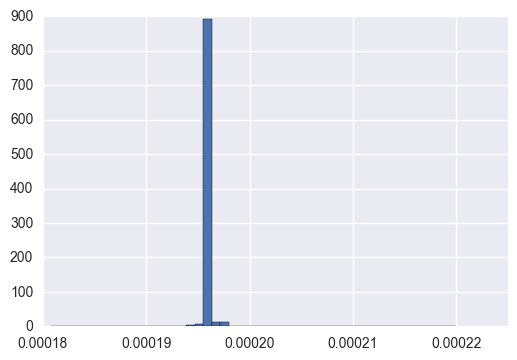

In [14]:
grouped_colls.avg_col.hist(bins=np.linspace(0.00018,0.00022))

In [18]:
print grouped_colls[grouped_colls.flag_hioni>0].shape
print grouped_colls.shape

(935, 4)
(100000, 4)


# approx 2e-4 collisions/mm, hence 2e-3 collisions/cm (OK with Rutherford calculations). 

But cannot explain why just 935 out of 10^4 particles suffered collisions

Average energy per collisions

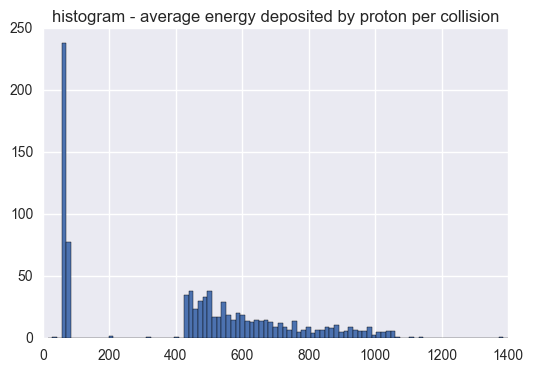

In [31]:
plt.figure()
grouped_colls.avg_energy.hist(bins=np.linspace(0,1400,100))
plt.title('histogram - average energy deposited by proton per collision')

In [ ]:
e